In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Load Data Sets

### articles

In [121]:
articles = pd.read_csv('../data/processed/articles_promo_group.csv')

In [116]:
articles.head()

,HEADLINE,HEADLINE_LEN,PUBLISH_DATE,DAY_OF_WEEK,PUBLISH_MONTH,PUBLISHTIMEINSECONDS,WEEKDAY,HOLIDAY,BUREAU,ARTICLE_TYPE,PROMO,CUM_SESSIONS_SOFAR,HEADLINE_GROUP,PROMO_GROUP
0,2 under-the-radar tech stocks to buy in 2022,45,2022-04-12,1,4,22740,Weekday,No,technology-and-telecom,article,These two companies an enjoying explosive top-...,207,7,1
1,does it matter that gamestop's split will be a...,63,2022-04-12,1,4,32400,Weekday,No,consumer-goods,article,Just how different is it from a cash dividend?,5811,3,3
2,is amazon stock a buy this month?,34,2022-04-12,1,4,38220,Weekday,No,consumer-goods,article,There are strong reasons to invest in Amazon r...,1637,3,1
3,2 stocks that cut you a check each month,41,2022-04-12,1,4,33420,Weekday,No,industrials,article,"For some investors, dividend income that flows...",2037,2,5
4,is amazon or alphabet the better stock split i...,57,2022-04-12,1,4,62220,Weekday,No,technology-and-telecom,article,Both companies dominate much of our digital li...,7682,3,3


In [149]:
articles['BUREAU'].value_counts()

technology-and-telecom            5366
consumer-goods                    4480
health-care                       2977
industrials                       2359
investment-planning               2040
financials                        1978
energy-materials-and-utilities    1513
cryptocurrency                     754
markets                            581
real estate                        534
cannabis                           517
Name: BUREAU, dtype: int64

In [123]:
articles.drop('Unnamed: 0', axis=1, inplace=True)

In [124]:
articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23099 entries, 0 to 23098
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   HEADLINE              23099 non-null  object
 1   HEADLINE_LEN          23099 non-null  int64 
 2   PUBLISH_DATE          23099 non-null  object
 3   DAY_OF_WEEK           23099 non-null  int64 
 4   PUBLISH_MONTH         23099 non-null  int64 
 5   PUBLISHTIMEINSECONDS  23099 non-null  int64 
 6   WEEKDAY               23099 non-null  object
 7   HOLIDAY               23099 non-null  object
 8   BUREAU                23099 non-null  object
 9   ARTICLE_TYPE          23099 non-null  object
 10  PROMO                 23099 non-null  object
 11  CUM_SESSIONS_SOFAR    23099 non-null  int64 
 12  HEADLINE_GROUP        23099 non-null  int64 
 13  PROMO_GROUP           23099 non-null  int64 
dtypes: int64(7), object(7)
memory usage: 2.5+ MB


In [125]:
articles.head()

,HEADLINE,HEADLINE_LEN,PUBLISH_DATE,DAY_OF_WEEK,PUBLISH_MONTH,PUBLISHTIMEINSECONDS,WEEKDAY,HOLIDAY,BUREAU,ARTICLE_TYPE,PROMO,CUM_SESSIONS_SOFAR,HEADLINE_GROUP,PROMO_GROUP
0,2 under-the-radar tech stocks to buy in 2022,45,2022-04-12,1,4,22740,Weekday,No,technology-and-telecom,article,These two companies an enjoying explosive top-...,207,0,3
1,does it matter that gamestop's split will be a...,63,2022-04-12,1,4,32400,Weekday,No,consumer-goods,article,Just how different is it from a cash dividend?,5811,2,1
2,is amazon stock a buy this month?,34,2022-04-12,1,4,38220,Weekday,No,consumer-goods,article,There are strong reasons to invest in Amazon r...,1637,5,2
3,2 stocks that cut you a check each month,41,2022-04-12,1,4,33420,Weekday,No,industrials,article,"For some investors, dividend income that flows...",2037,0,6
4,is amazon or alphabet the better stock split i...,57,2022-04-12,1,4,62220,Weekday,No,technology-and-telecom,article,Both companies dominate much of our digital li...,7682,2,1


### gtrends by bureau

In [140]:
gtrends = pd.read_csv('../data/processed/gtrends.csv')

In [141]:
gtrends

,Unnamed: 0,date,keyword,gtrends_bureau_index,bureau
0,0,2020-08-02,technology stocks,45.0,technology-and-telecom
1,1,2020-08-03,technology stocks,45.0,technology-and-telecom
2,2,2020-08-04,technology stocks,45.0,technology-and-telecom
3,3,2020-08-05,technology stocks,45.0,technology-and-telecom
4,4,2020-08-06,technology stocks,45.0,technology-and-telecom
...,...,...,...,...,...
8107,8107,2022-04-13,stocks to buy,8.0,NaN
8108,8108,2022-04-14,stocks to buy,8.0,NaN
8109,8109,2022-04-15,stocks to buy,8.0,NaN
8110,8110,2022-04-16,stocks to buy,8.0,NaN


In [142]:
gtrends[gtrends['keyword']== 'cannabis stocks']

,Unnamed: 0,date,keyword,gtrends_bureau_index,bureau
6240,6240,2020-08-02,cannabis stocks,7.0,cannabis
6241,6241,2020-08-03,cannabis stocks,7.0,cannabis
6242,6242,2020-08-04,cannabis stocks,7.0,cannabis
6243,6243,2020-08-05,cannabis stocks,7.0,cannabis
6244,6244,2020-08-06,cannabis stocks,7.0,cannabis
...,...,...,...,...,...
6859,6859,2022-04-13,cannabis stocks,4.0,cannabis
6860,6860,2022-04-14,cannabis stocks,4.0,cannabis
6861,6861,2022-04-15,cannabis stocks,4.0,cannabis
6862,6862,2022-04-16,cannabis stocks,4.0,cannabis


In [143]:
gtrends.drop('Unnamed: 0', axis=1, inplace=True)

In [144]:
gtrends

,date,keyword,gtrends_bureau_index,bureau
0,2020-08-02,technology stocks,45.0,technology-and-telecom
1,2020-08-03,technology stocks,45.0,technology-and-telecom
2,2020-08-04,technology stocks,45.0,technology-and-telecom
3,2020-08-05,technology stocks,45.0,technology-and-telecom
4,2020-08-06,technology stocks,45.0,technology-and-telecom
...,...,...,...,...
8107,2022-04-13,stocks to buy,8.0,NaN
8108,2022-04-14,stocks to buy,8.0,NaN
8109,2022-04-15,stocks to buy,8.0,NaN
8110,2022-04-16,stocks to buy,8.0,NaN


In [145]:
gtrends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8112 entries, 0 to 8111
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  8112 non-null   object 
 1   keyword               8112 non-null   object 
 2   gtrends_bureau_index  8112 non-null   float64
 3   bureau                7488 non-null   object 
dtypes: float64(1), object(3)
memory usage: 253.6+ KB


### S and P 500

In [104]:
sp = pd.read_csv('../data/processed/snp_filled.csv')

In [105]:
sp.head()

,DATE,SP_INDEX
0,2019-01-01,NaN
1,2019-01-02,2510.03
2,2019-01-03,2447.89
3,2019-01-04,2531.94
4,2019-01-05,2531.94


In [77]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204 entries, 0 to 1203
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DATE      1204 non-null   object 
 1   SP_INDEX  1203 non-null   float64
dtypes: float64(1), object(1)
memory usage: 18.9+ KB


## Merge everything together!

In [150]:
# add s and p data
articles_sp = articles.merge(sp, how= 'left', left_on=['PUBLISH_DATE'], right_on=['DATE'])

In [107]:
articles_sp

,HEADLINE,HEADLINE_LEN,PUBLISH_DATE,DAY_OF_WEEK,PUBLISH_MONTH,PUBLISHTIMEINSECONDS,WEEKDAY,HOLIDAY,BUREAU,ARTICLE_TYPE,PROMO,CUM_SESSIONS_SOFAR,HEADLINE_GROUP,PROMO_GROUP,DATE,SP_INDEX
0,2 under-the-radar tech stocks to buy in 2022,45,2022-04-12,1,4,22740,Weekday,No,technology-and-telecom,article,These two companies an enjoying explosive top-...,207,7,1,2022-04-12,4397.45
1,does it matter that gamestop's split will be a...,63,2022-04-12,1,4,32400,Weekday,No,consumer-goods,article,Just how different is it from a cash dividend?,5811,3,3,2022-04-12,4397.45
2,is amazon stock a buy this month?,34,2022-04-12,1,4,38220,Weekday,No,consumer-goods,article,There are strong reasons to invest in Amazon r...,1637,3,1,2022-04-12,4397.45
3,2 stocks that cut you a check each month,41,2022-04-12,1,4,33420,Weekday,No,industrials,article,"For some investors, dividend income that flows...",2037,2,5,2022-04-12,4397.45
4,is amazon or alphabet the better stock split i...,57,2022-04-12,1,4,62220,Weekday,No,technology-and-telecom,article,Both companies dominate much of our digital li...,7682,3,3,2022-04-12,4397.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24940,why affimed stock is heating up today,38,2022-04-11,0,4,44520,Weekday,No,health-care,10% promise series,The biotech's experimental blood cancer treatm...,318,9,3,2022-04-11,4412.53
24941,3 beaten-down growth stocks -- can they recover?,49,2022-04-11,0,4,23940,Weekday,No,technology-and-telecom,article,These former stock market darlings can be purc...,4138,2,1,2022-04-11,4412.53
24942,why shares of dingdong are volatile today,42,2022-04-11,0,4,47880,Weekday,No,consumer-goods,10% promise series,Lockdowns in China might create a beneficial e...,96,9,3,2022-04-11,4412.53
24943,this cybersecurity stock could just be getting...,55,2022-04-11,0,4,33480,Weekday,No,technology-and-telecom,article,CrowdStrike's stock has cratered during the te...,942,3,1,2022-04-11,4412.53


In [64]:
gtrends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5894 entries, 0 to 5893
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            5894 non-null   object 
 1   variable        5894 non-null   object 
 2   gtrends_bureau  5894 non-null   float64
 3   bureau          5052 non-null   object 
dtypes: float64(1), object(3)
memory usage: 184.3+ KB


In [90]:
gtrends[(gtrends['date'] == '2022-02-12') & (gtrends['bureau'] == 'cannabis')]

,date,variable,gtrends_bureau,bureau


In [85]:
gtrends['date'].min()

'2021-01-03'

In [87]:
gtrends['date'].max()

'2022-02-27'

In [151]:
# add gtrends
articles_sp_trends = articles_sp.merge(gtrends, how='left', left_on=['PUBLISH_DATE', 'BUREAU'], right_on=['date', 'bureau'])

In [136]:
articles_sp_trends.tail(100)

,HEADLINE,HEADLINE_LEN,PUBLISH_DATE,DAY_OF_WEEK,PUBLISH_MONTH,PUBLISHTIMEINSECONDS,WEEKDAY,HOLIDAY,BUREAU,ARTICLE_TYPE,PROMO,CUM_SESSIONS_SOFAR,HEADLINE_GROUP,PROMO_GROUP,DATE,SP_INDEX,date,keyword,gtrends_bureau_index,bureau
24845,why dutch bros coffee stock was piping hot las...,53,2022-01-27,3,1,75900,Weekday,No,consumer-goods,10% promise series,The upstart coffee chain is reportedly outperf...,3901,3,3,2022-01-27,4326.51,2022-01-27,consumer goods stocks,43.0,consumer-goods
24846,market sell-off: time to buy autodesk?,39,2022-03-22,1,3,29580,Weekday,No,industrials,article,A look at the industrial software company as i...,714,7,3,2022-03-22,4511.61,2022-03-22,industrials stocks,28.0,industrials
24847,these 3 stocks are safe bets in the event of a...,60,2022-01-24,0,1,37200,Weekday,No,financials,article,"If the market crashes, get defensive.",5307,2,3,2022-01-24,4410.13,2022-01-24,financials stocks,57.0,financials
24848,1 red flag and 1 green flag for scotts miracle...,51,2022-02-12,5,2,25140,Weekend,No,cannabis,article,The gardening company's share price and revenu...,772,1,5,2022-02-12,4418.64,2022-02-12,cannabis stocks,4.0,cannabis
24849,buying this stock could be the smartest thing ...,58,2022-02-13,6,2,21600,Weekend,No,consumer-goods,article,This industry giant is investing in its future.,2543,3,3,2022-02-13,4418.64,2022-02-13,consumer goods stocks,66.0,consumer-goods
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24940,why affimed stock is heating up today,38,2022-04-11,0,4,44520,Weekday,No,health-care,10% promise series,The biotech's experimental blood cancer treatm...,318,9,3,2022-04-11,4412.53,2022-04-11,health care stocks,46.0,health-care
24941,3 beaten-down growth stocks -- can they recover?,49,2022-04-11,0,4,23940,Weekday,No,technology-and-telecom,article,These former stock market darlings can be purc...,4138,2,1,2022-04-11,4412.53,2022-04-11,technology stocks,18.0,technology-and-telecom
24942,why shares of dingdong are volatile today,42,2022-04-11,0,4,47880,Weekday,No,consumer-goods,10% promise series,Lockdowns in China might create a beneficial e...,96,9,3,2022-04-11,4412.53,2022-04-11,consumer goods stocks,63.0,consumer-goods
24943,this cybersecurity stock could just be getting...,55,2022-04-11,0,4,33480,Weekday,No,technology-and-telecom,article,CrowdStrike's stock has cratered during the te...,942,3,1,2022-04-11,4412.53,2022-04-11,technology stocks,18.0,technology-and-telecom


In [152]:
articles_sp_trends.isnull().sum()

HEADLINE                0
HEADLINE_LEN            0
PUBLISH_DATE            0
DAY_OF_WEEK             0
PUBLISH_MONTH           0
PUBLISHTIMEINSECONDS    0
WEEKDAY                 0
HOLIDAY                 0
BUREAU                  0
ARTICLE_TYPE            0
PROMO                   0
CUM_SESSIONS_SOFAR      0
HEADLINE_GROUP          0
PROMO_GROUP             0
DATE                    0
SP_INDEX                0
date                    0
keyword                 0
gtrends_bureau_index    0
bureau                  0
dtype: int64

In [153]:
articles_sp_trends[articles_sp_trends['BUREAU'] == 'cannabis']

,HEADLINE,HEADLINE_LEN,PUBLISH_DATE,DAY_OF_WEEK,PUBLISH_MONTH,PUBLISHTIMEINSECONDS,WEEKDAY,HOLIDAY,BUREAU,ARTICLE_TYPE,PROMO,CUM_SESSIONS_SOFAR,HEADLINE_GROUP,PROMO_GROUP,DATE,SP_INDEX,date,keyword,gtrends_bureau_index,bureau
38,these 3 stocks have doubled over 2 years. can ...,64,2022-04-12,1,4,25440,Weekday,No,cannabis,article,Being part of high-growth sectors increases th...,283,0,3,2022-04-12,4397.45,2022-04-12,cannabis stocks,4.0,cannabis
39,why canopy growth and green thumb industries s...,79,2022-04-12,1,4,64140,Weekday,No,cannabis,10% promise series,The moves seemed to be linked to a financing d...,614,8,1,2022-04-12,4397.45,2022-04-12,cannabis stocks,4.0,cannabis
51,"why hexo, tilray, and sundial stocks popped on...",55,2022-04-12,1,4,49140,Weekday,No,cannabis,article,Hexo and Tilray will make a joint effort to cu...,1786,0,6,2022-04-12,4397.45,2022-04-12,cannabis stocks,4.0,cannabis
69,why organigram shares popped today,35,2022-04-12,1,4,40380,Weekday,No,cannabis,10% promise series,A 117% year-over-year jump in net revenue caug...,1064,8,6,2022-04-12,4397.45,2022-04-12,cannabis stocks,4.0,cannabis
78,should innovative industrial properties invest...,81,2022-04-12,1,4,62100,Weekday,No,cannabis,article,"Probably not, but it's worth understanding why.",780,3,1,2022-04-12,4397.45,2022-04-12,cannabis stocks,4.0,cannabis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22879,could innovative industrial properties stock h...,76,2022-01-19,2,1,22020,Weekday,No,cannabis,article,"Yes, if you're patient.",3208,2,1,2022-01-19,4532.76,2022-01-19,cannabis stocks,3.0,cannabis
22992,"why canopy growth, sundial growers, and aurora...",76,2022-02-09,2,2,45240,Weekday,No,cannabis,article,Canopy Growth reported better-than-expected ov...,14702,8,3,2022-02-09,4587.18,2022-02-09,cannabis stocks,4.0,cannabis
23007,is a reverse stock split coming for these 2 po...,56,2022-02-07,0,2,23880,Weekday,No,cannabis,article,These are not the kind of splits investors usu...,9934,2,6,2022-02-07,4483.87,2022-02-07,cannabis stocks,4.0,cannabis
23012,1 red flag and 1 green flag for scotts miracle...,51,2022-02-12,5,2,25140,Weekend,No,cannabis,article,The gardening company's share price and revenu...,772,3,8,2022-02-12,4418.64,2022-02-12,cannabis stocks,4.0,cannabis


In [154]:
articles_sp_trends[articles_sp_trends['gtrends_bureau_index'].isnull()]

,HEADLINE,HEADLINE_LEN,PUBLISH_DATE,DAY_OF_WEEK,PUBLISH_MONTH,PUBLISHTIMEINSECONDS,WEEKDAY,HOLIDAY,BUREAU,ARTICLE_TYPE,PROMO,CUM_SESSIONS_SOFAR,HEADLINE_GROUP,PROMO_GROUP,DATE,SP_INDEX,date,keyword,gtrends_bureau_index,bureau


In [92]:
len(articles_sp_trends)

24945

In [155]:
article_final = articles_sp_trends[[
'HEADLINE',            
'HEADLINE_LEN',        
'PUBLISH_DATE',        
'DAY_OF_WEEK',         
'PUBLISH_MONTH',       
'PUBLISHTIMEINSECONDS',
'WEEKDAY',             
'HOLIDAY',             
'BUREAU',              
'ARTICLE_TYPE',        
'PROMO',               
'CUM_SESSIONS_SOFAR',  
'HEADLINE_GROUP',      
'PROMO_GROUP',                       
'SP_INDEX',                       
'gtrends_bureau_index'                                             
                                   ]]

In [156]:
article_final

,HEADLINE,HEADLINE_LEN,PUBLISH_DATE,DAY_OF_WEEK,PUBLISH_MONTH,PUBLISHTIMEINSECONDS,WEEKDAY,HOLIDAY,BUREAU,ARTICLE_TYPE,PROMO,CUM_SESSIONS_SOFAR,HEADLINE_GROUP,PROMO_GROUP,SP_INDEX,gtrends_bureau_index
0,2 under-the-radar tech stocks to buy in 2022,45,2022-04-12,1,4,22740,Weekday,No,technology-and-telecom,article,These two companies an enjoying explosive top-...,207,0,3,4397.45,18.0
1,does it matter that gamestop's split will be a...,63,2022-04-12,1,4,32400,Weekday,No,consumer-goods,article,Just how different is it from a cash dividend?,5811,2,1,4397.45,63.0
2,is amazon stock a buy this month?,34,2022-04-12,1,4,38220,Weekday,No,consumer-goods,article,There are strong reasons to invest in Amazon r...,1637,5,2,4397.45,63.0
3,2 stocks that cut you a check each month,41,2022-04-12,1,4,33420,Weekday,No,industrials,article,"For some investors, dividend income that flows...",2037,0,6,4397.45,0.0
4,is amazon or alphabet the better stock split i...,57,2022-04-12,1,4,62220,Weekday,No,technology-and-telecom,article,Both companies dominate much of our digital li...,7682,2,1,4397.45,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23094,why affimed stock is heating up today,38,2022-04-11,0,4,44520,Weekday,No,health-care,10% promise series,The biotech's experimental blood cancer treatm...,318,2,1,4412.53,46.0
23095,3 beaten-down growth stocks -- can they recover?,49,2022-04-11,0,4,23940,Weekday,No,technology-and-telecom,article,These former stock market darlings can be purc...,4138,0,2,4412.53,18.0
23096,why shares of dingdong are volatile today,42,2022-04-11,0,4,47880,Weekday,No,consumer-goods,10% promise series,Lockdowns in China might create a beneficial e...,96,8,5,4412.53,63.0
23097,this cybersecurity stock could just be getting...,55,2022-04-11,0,4,33480,Weekday,No,technology-and-telecom,article,CrowdStrike's stock has cratered during the te...,942,2,5,4412.53,18.0


In [157]:
article_final.to_csv('../data/processed/articles_final_features.csv')

In [3]:
reload = pd.read_csv('../data/processed/articles_final_features.csv')

In [4]:
reload.head()

,Unnamed: 0,HEADLINE,HEADLINE_LEN,PUBLISH_DATE,DAY_OF_WEEK,PUBLISH_MONTH,PUBLISHTIMEINSECONDS,WEEKDAY,HOLIDAY,BUREAU,ARTICLE_TYPE,PROMO,CUM_SESSIONS_SOFAR,HEADLINE_GROUP,PROMO_GROUP,SP_INDEX,gtrends_bureau_index
0,0,2 under-the-radar tech stocks to buy in 2022,45,2022-04-12,1,4,22740,Weekday,No,technology-and-telecom,article,These two companies an enjoying explosive top-...,207,0,3,4397.45,18.0
1,1,does it matter that gamestop's split will be a...,63,2022-04-12,1,4,32400,Weekday,No,consumer-goods,article,Just how different is it from a cash dividend?,5811,2,1,4397.45,63.0
2,2,is amazon stock a buy this month?,34,2022-04-12,1,4,38220,Weekday,No,consumer-goods,article,There are strong reasons to invest in Amazon r...,1637,5,2,4397.45,63.0
3,3,2 stocks that cut you a check each month,41,2022-04-12,1,4,33420,Weekday,No,industrials,article,"For some investors, dividend income that flows...",2037,0,6,4397.45,0.0
4,4,is amazon or alphabet the better stock split i...,57,2022-04-12,1,4,62220,Weekday,No,technology-and-telecom,article,Both companies dominate much of our digital li...,7682,2,1,4397.45,18.0


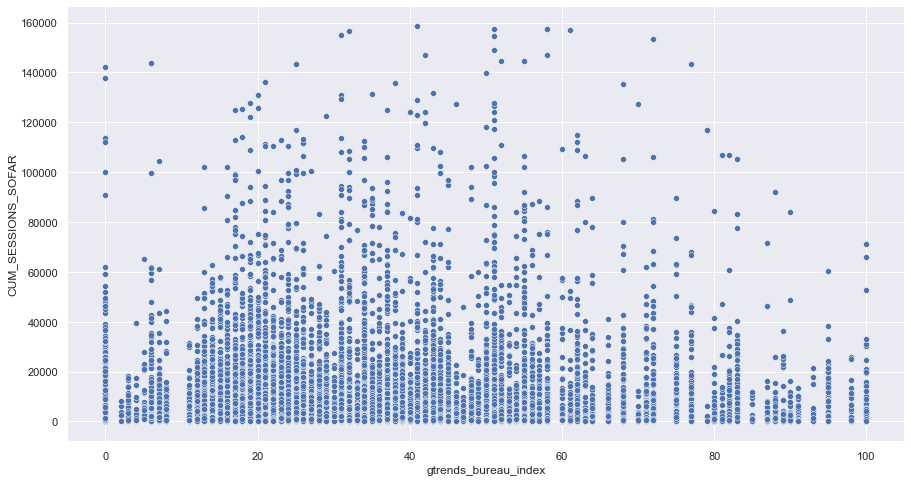

In [5]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.scatterplot(data = reload, x='gtrends_bureau_index', y='CUM_SESSIONS_SOFAR' );

- some of the higer sessions seem to have more mid-range gtrends indices
- i wonder if it's because higher indices means higher competition, so maybe it's best to cover things in the middle?

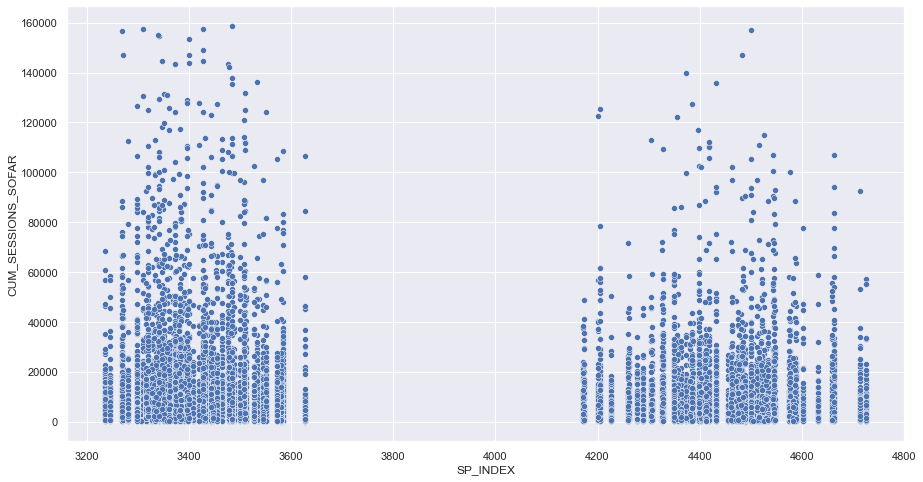

In [6]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.scatterplot(data = reload, x='SP_INDEX', y='CUM_SESSIONS_SOFAR' );

- this doesn't seem like a very good variable... i think something measure volatility would be better, or perhaps a sort of time series